In [2]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib

In [7]:
X_test_encoded = np.load('../data/X_test_encoded.npy')
y_test = np.load('../data/y_test.npy')

best_model = joblib.load('../results/best_smote_model.joblib')

with open('../results/feature_names.json') as f:
    feature_names = json.load(f)

In [4]:
# Initialize SHAP Tree Explainer
explainer = shap.Explainer(best_model)

# Calculate SHAP values
shap_values = explainer(X_test_encoded)

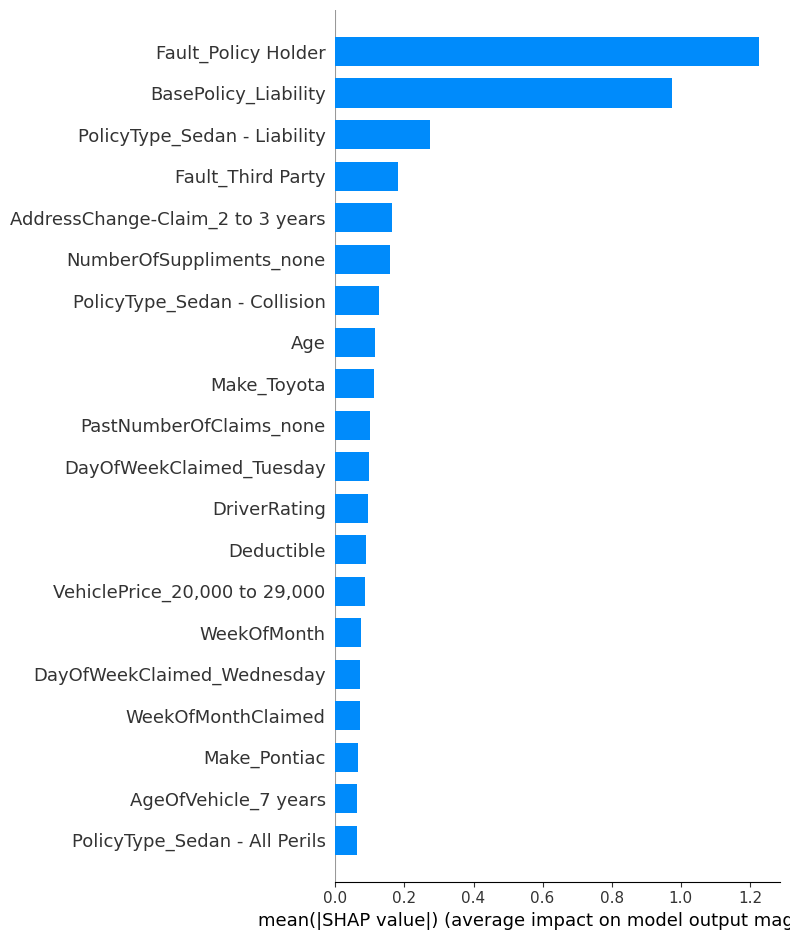

In [8]:
# Plot feature importance (summary plot)
shap.summary_plot(shap_values.values, X_test_encoded, plot_type="bar", feature_names=feature_names)

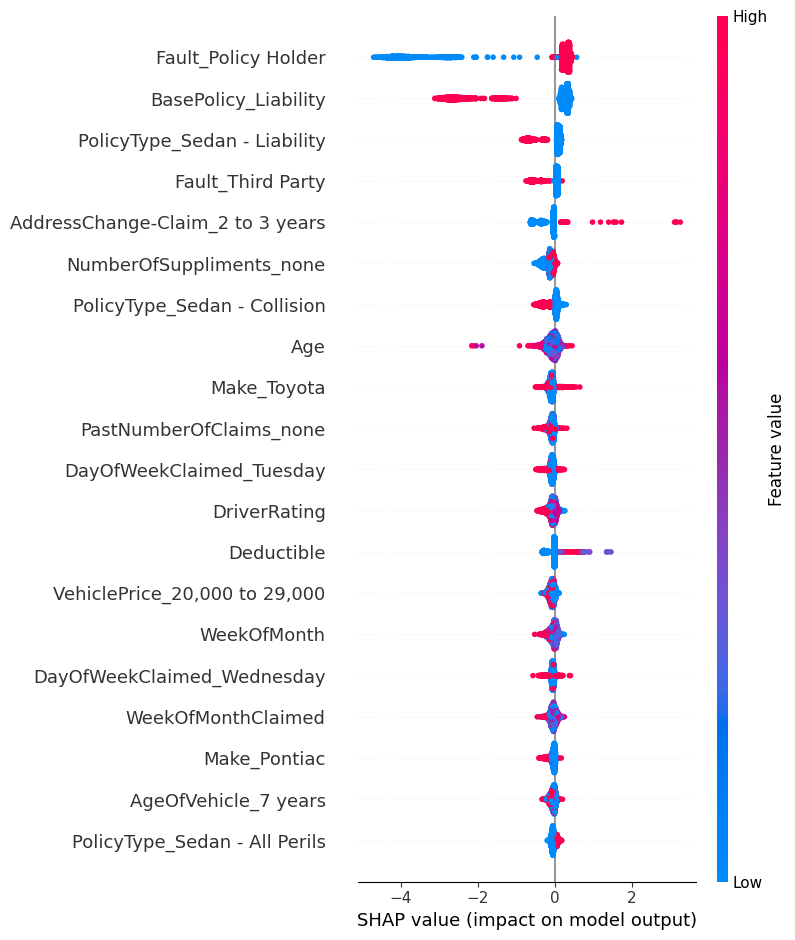

In [9]:
shap.summary_plot(shap_values.values, X_test_encoded, feature_names=feature_names)

In [10]:
# Visualize one example
shap.plots.force(explainer.expected_value, shap_values.values[0,:], X_test_encoded[0,:])